# Problem statement
Example 4.1 - Reinforcement Learning: An Introduction, Sutton and Barto, Second Edition - Dynamic Programming

The agent at each step has 4 possible actions including up, down, left and right. The terminal states are top left and bottom right with 0 reward. Every other step leads to a -1 reward.

            T  o  o  o
            o  x  o  o
            o  o  o  o
            o  o  o  T

In this notebook, we find the best policy using value iteration method. This method only iterates through the Bellman equation to calculate the optimal value function, and does not improve the policy for this purpose. The optimal policy is created after the optimal value function is calculated.

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

if "../" not in sys.path:
  sys.path.append("../") 


from envs.gridworld import GridworldEnv

In [2]:
env = GridworldEnv()

In [3]:
def value_iteration(env, convergence_criterion=1e-4, discount_factor=1.0):
    """
    Value iteration algorithm
    
    @env: OpenAI environment
          env.P: transition probabilities of the environment
          env.P[state][action]: list of transition tuples (prob, next_state, reward, done)
          env.nS: number of states in the environment 
          env.nA is a number of actions in the environment
        @convergence_criterion: iterations convergence criterion for all the state values
        discount_factor: Gamma discount factor
        
    Returns:
        optimal policy and the optimal value function tuple (policy, V)
    """
    
    def one_step_lookahead(state, value):
        """
        Calculates the value for all actions in a given state
        
        @state: The state being evaluated (int)
        @value: The value to use as an estimator (vector of length env.nS)
        
        Returns:
            Expected value of all actions available in a state (a vector of length env.nA)
        """
        state_actions_values = np.zeros(env.nA)
        for action in range(env.nA):
            for prob, next_state, reward, done in env.P[state][action]:
                state_actions_values[action] += prob * (reward + discount_factor * value[next_state])
        return state_actions_values
    
    value = np.zeros(env.nS)
    while True:
        # Stopping condition
        delta_value = 0
        for state in range(env.nS):
            # Do a one-step lookahead to find the best action
            state_actions_values = one_step_lookahead(state, value)
            best_action_value = np.max(state_actions_values)
            # Update the maximum value change
            delta_value = max(delta_value, np.abs(best_action_value - value[state]))
            # Update the value function
            value[state] = best_action_value
        # Check if we can stop 
        if delta_value < convergence_criterion:
            break
    
    # Create a deterministic policy using the optimal value function
    policy = np.zeros([env.nS, env.nA])
    for s in range(env.nS):
        # One step lookahead to find the best action for this state
        state_actions_values = one_step_lookahead(s, value)
        best_action = np.argmax(state_actions_values)
        # Always take the best action
        policy[state, best_action] = 1.0
    
    return policy, value

In [4]:
def value_iteration(env, convergence_criterion=0.0001, discount_factor=1.0):
    """
    Value iteration algorithm
    
    @env: OpenAI environment
          env.P: transition probabilities of the environment
          env.P[state][action]: list of transition tuples (prob, next_state, reward, done)
          env.nS: number of states in the environment 
          env.nA is a number of actions in the environment
        @convergence_criterion: iterations convergence criterion for all the state values
        discount_factor: Gamma discount factor
        
    Returns:
        optimal policy and the optimal value function tuple (policy, V)
    """
    
    def one_step_lookahead(state, value):
        """
        Calculates the value for all actions in a given state
        
        @state: The state being evaluated (int)
        @value: The value to use as an estimator (vector of length env.nS)
        
        Returns:
            Expected value of all actions available in a state (a vector of length env.nA)
        """
        state_actions_values = np.zeros(env.nA)
        for action in range(env.nA):
            for prob, next_state, reward, done in env.P[state][action]:
                state_actions_values[action] += prob * (reward + discount_factor * value[next_state])
        return state_actions_values
    
    value = np.zeros(env.nS)
    while True:
        # Maximum change in the value function update
        delta_value = 0
        for state in range(env.nS):
            # The best action by one-step lookahead
            state_actions_values = one_step_lookahead(state, value)
            best_action_value = np.max(state_actions_values)
            # How much our value function changed (across any states)
            delta_value = max(delta_value, np.abs(best_action_value - value[state]))
            value[state] = best_action_value        
        # Check for convergence
        if delta_value < convergence_criterion:
            break
    
    # Create a deterministic policy using the optimal value function
    policy = np.zeros([env.nS, env.nA])
    for state in range(env.nS):
        # The best action by one-step lookahead
        state_actions_values = one_step_lookahead(state, value)
        best_action = np.argmax(state_actions_values)
        # Greedily calculate the policy
        policy[state, best_action] = 1.0
    
    return policy, value

In [5]:
policy, value = value_iteration(env)

In [6]:
print(policy)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [7]:
print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
policy_reshaped = np.reshape(np.argmax(policy, axis=1), env.shape)
print(policy_reshaped)

Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):
[[0 3 3 2]
 [0 0 0 2]
 [0 0 1 2]
 [0 1 1 0]]


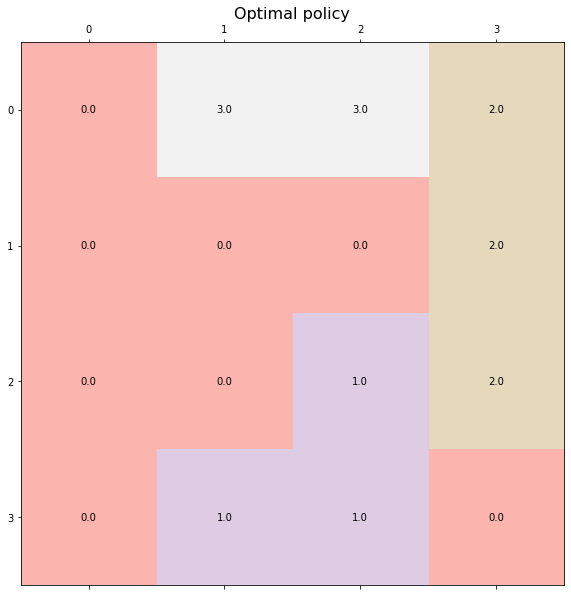

In [8]:
fig, ax = plt.subplots(figsize=(12,10))
ax.matshow(policy_reshaped, cmap='Pastel1')
for (i, j), z in np.ndenumerate(policy_reshaped):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_title('Optimal policy', fontsize=16)
plt.show()

In [9]:
print("Reshaped Grid Value Function:")
value_reshape = value.reshape(env.shape)
print(value_reshape)

Reshaped Grid Value Function:
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]


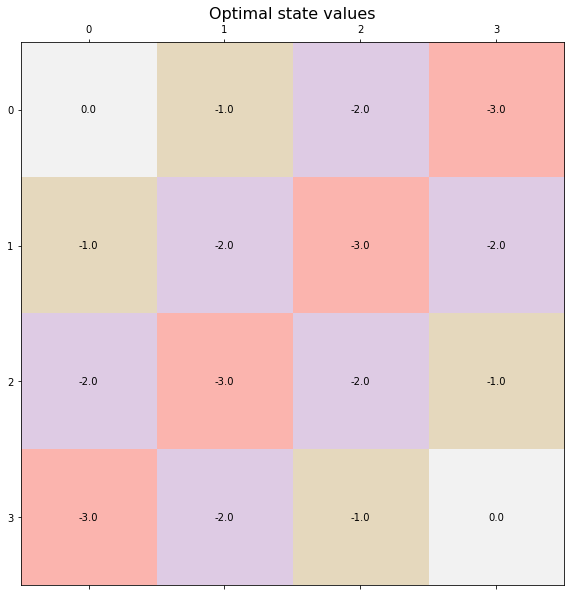

In [10]:
fig, ax = plt.subplots(figsize=(12,10))
ax.matshow(value_reshape, cmap='Pastel1')
for (i, j), z in np.ndenumerate(value_reshape):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_title('Optimal state values', fontsize=16)
plt.show()